In [1]:
# IMPORTING LIBRARIES
import os
import pandas as pd                                   # data processing
import matplotlib.pyplot as plt                        # data visualization
import seaborn as sns                                  # data visualization

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Plot settings (optional)
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 120
print('Libraries imported.')

Libraries imported.


In [2]:
# LOADING DATASET
# Tries local iris.csv; if missing, pulls from seaborn and saves a copy for consistency.
csv_path = "iris.csv"
if os.path.exists(csv_path):
    data = pd.read_csv(csv_path)
else:
    data = sns.load_dataset("iris")
    data.rename(columns={
        "sepal_length":"sepal_length",
        "sepal_width":"sepal_width",
        "petal_length":"petal_length",
        "petal_width":"petal_width",
        "species":"species"
    }, inplace=True)
    data.to_csv(csv_path, index=False)

print("Loaded shape:", data.shape)
data.head()

Loaded shape: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
print("Missing values by column:\n", data.isnull().sum())
print("\nColumns:", list(data.columns))
print("\nDtypes:\n", data.dtypes)
data.describe()

Missing values by column:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Dtypes:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


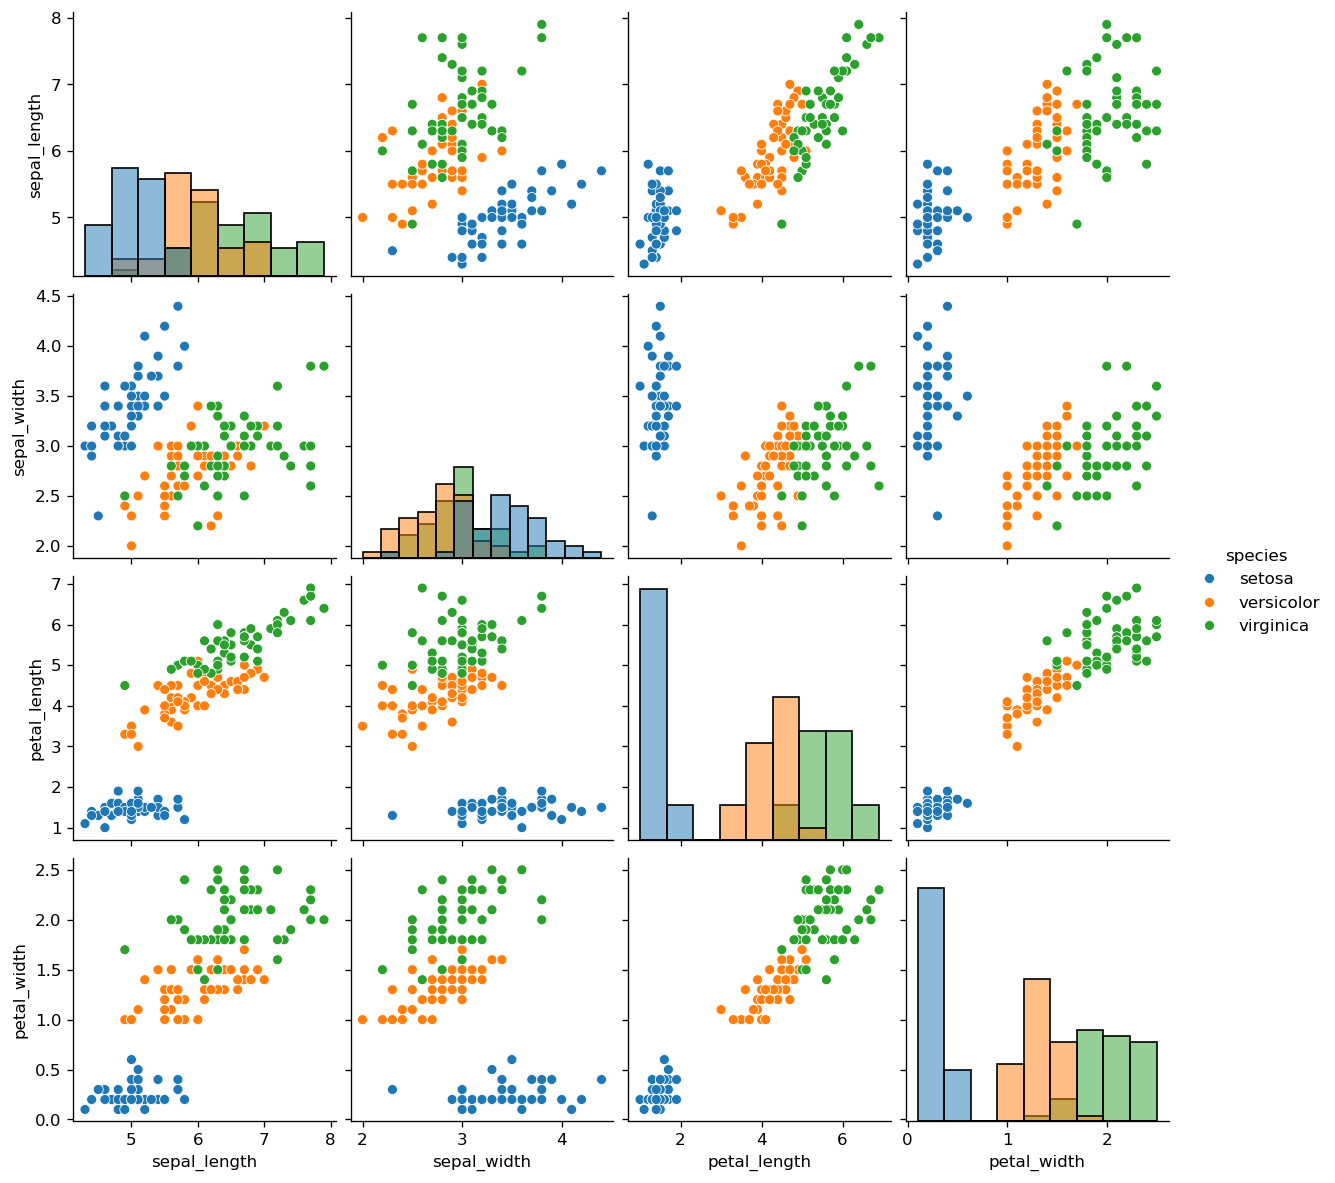

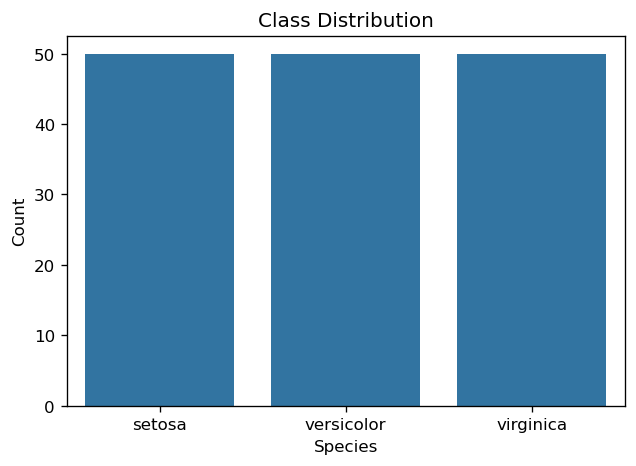

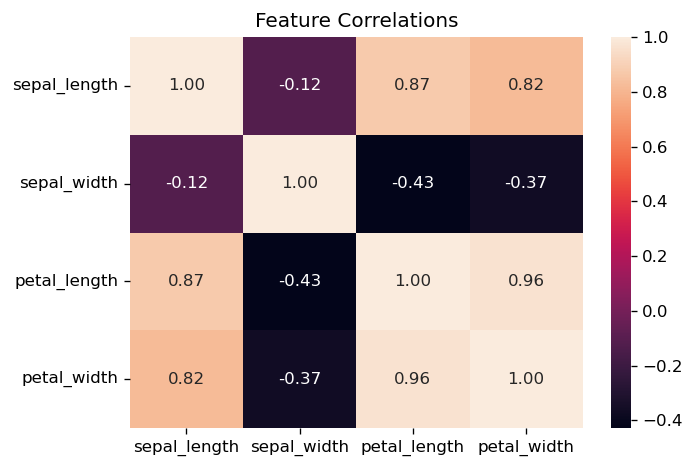

In [4]:
# 1) Pairplot to see class separation
sns.pairplot(data, hue="species", diag_kind="hist")
plt.show()

# 2) Distribution/count of classes
sns.countplot(data=data, x="species")
plt.title("Class Distribution")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

# 3) Correlation heatmap of numeric features
import numpy as np
corr = data.drop(columns=["species"]).corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Feature Correlations")
plt.tight_layout()
plt.show()

In [5]:
X = data.drop("species", axis=1)
Y = data["species"]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)
print("Train shape:", X_train.shape, " Test shape:", X_test.shape)

Train shape: (120, 4)  Test shape: (30, 4)


In [6]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)
print("Model trained.")

Model trained.


In [7]:
Y_pred = model.predict(X_test)
print("Predictions:", Y_pred[:10], "...")

acc = accuracy_score(Y_test, Y_pred)
print(f"\nAccuracy: {acc:.4f}\n")
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Predictions: ['setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor'] ...

Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


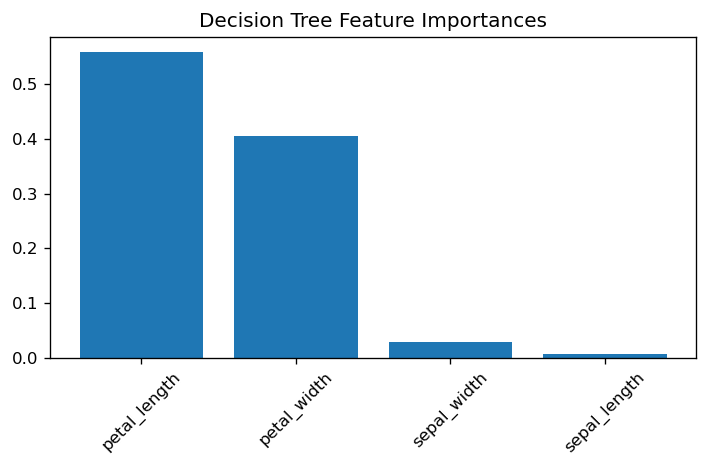

In [8]:
# Plot feature importances if available
if hasattr(model, "feature_importances_"):
    import numpy as np
    importances = model.feature_importances_
    order = np.argsort(importances)[::-1]
    plt.bar(range(len(importances)), importances[order])
    plt.xticks(range(len(importances)), X.columns[order], rotation=45)
    plt.title("Decision Tree Feature Importances")
    plt.tight_layout()
    plt.show()